# SciKit Show & Tell Using Ridge to Reef Data
### by Sarah Morrison

"Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use.

The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn." (Brownlee)

#### In order to show the full usefullness of SciKit, I would need to use a couple other libraries. 
* Pandas: excellent library for working with data in python in Dataframes (tables) and Series (columns)
* Numpy: library for working with numerical values and storing arrays and matrices
* Pyplot: common visualization library

Today I will be showing SciKit's linear regression and nearest neighbor computations.

### Importing data and Setting Up!
Identifying important pieces of the data and clarifying them in order to make a proper graph is important to make sure SciKit-learn computes it all correctly. (???)

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('hybrid_yields.csv')

#### Getting dimensions

In [6]:
data.shape

(24, 5)

Great! Now that we got the dimensions of how much data we want to use, we are going to use data.head() to take a look at first 5 rows.

In [7]:
data.head()

,Unnamed: 0,VARIETY,ALTITUDE RANGE (M),yield (kg/ha),days_to_maturity
0,0,H6213,1700-2100,4680.0,175.0
1,1,H6212,1700-2100,4680.0,175.0
2,2,H6210,1700-2100,4500.0,175.0
3,3,H9401,1700-2100,4320.0,175.0
4,4,H629,1700-2400,4320.0,175.0


So, there is an extra column but it can be dropped later. We will be getting the column names.

In [8]:
data.columns

Index(['Unnamed: 0', 'VARIETY', 'ALTITUDE  RANGE (M)', 'yield (kg/ha)',
       'days_to_maturity'],
      dtype='object')

Now we will be exploring the Series, which can also be referred to as column, days_to_maturity using data[  ]

In [9]:
data['days_to_maturity']

0     175.0
1     175.0
2     175.0
3     175.0
4     175.0
5     165.0
6     165.0
7     165.0
8     165.0
9     175.0
10    160.0
11    165.0
12    120.0
13    135.0
14    125.0
15    125.0
16    105.0
17     97.5
18    110.0
19    110.0
20    110.0
21    110.0
22     97.5
23     97.5
Name: days_to_maturity, dtype: float64

Grab a sample data point, which can also be referred to as a row, from the data

In [10]:
data.sample()

,Unnamed: 0,VARIETY,ALTITUDE RANGE (M),yield (kg/ha),days_to_maturity
19,19,DH02,800 – 1200,1350.0,110.0


In [11]:
data['Unnamed: 0']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
Name: Unnamed: 0, dtype: int64

Below we will be dropping the column from our data frame as I said earlier.

In [12]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [13]:
data.head()

,VARIETY,ALTITUDE RANGE (M),yield (kg/ha),days_to_maturity
0,H6213,1700-2100,4680.0,175.0
1,H6212,1700-2100,4680.0,175.0
2,H6210,1700-2100,4500.0,175.0
3,H9401,1700-2100,4320.0,175.0
4,H629,1700-2400,4320.0,175.0


Get all unique values in a series and their absolute count

In [14]:
data['VARIETY'].value_counts()

H6213                 1
H626                  1
H625                  1
Katumani Composite    1
DH01                  1
DH03                  1
H627                  1
H516                  1
PH4                   1
H511                  1
H6212                 1
PH1                   1
H9401                 1
DH04                  1
H628                  1
H515                  1
H6210                 1
H629                  1
H624                  1
H623                  1
H614                  1
DLC1                  1
DH02                  1
H513                  1
Name: VARIETY, dtype: int64

In [15]:
data.columns

Index(['VARIETY', 'ALTITUDE  RANGE (M)', 'yield (kg/ha)', 'days_to_maturity'], dtype='object')

In [16]:
data["ALTITUDE\xa0 RANGE (M)"]

0      1700-2100
1      1700-2100
2      1700-2100
3      1700-2100
4      1700-2400
5      1500-2100
6      1500-2100
7      1500-2100
8      1500-2100
9      1500-2100
10     1000-1800
11     1000-1800
12     1000-1800
13     1000-1800
14     1000-1800
15     1000-1800
16      0 – 1200
17      0 – 1200
18      800-1200
19    800 – 1200
20    800 – 1200
21    800 – 1200
22     1000-1900
23     1000-1900
Name: ALTITUDE  RANGE (M), dtype: object

### What are we doing here, tf is the \xa0 thing... is it imprtant to explain?

In [17]:
data['ALTITUDE\xa0 RANGE (M)'].value_counts()

1000-1800     6
1500-2100     5
1700-2100     4
800 – 1200    3
1000-1900     2
0 – 1200      2
1700-2400     1
800-1200      1
Name: ALTITUDE  RANGE (M), dtype: int64

In [18]:
data.columns

Index(['VARIETY', 'ALTITUDE  RANGE (M)', 'yield (kg/ha)', 'days_to_maturity'], dtype='object')

In [19]:
data = data.drop(['VARIETY'], axis = 1)

In [20]:
data.shape

(24, 3)

In [21]:
data.columns

Index(['ALTITUDE  RANGE (M)', 'yield (kg/ha)', 'days_to_maturity'], dtype='object')

Extracting features (X) and target variable (y) 
#### (WHY????)

In [22]:
X = data.drop(['yield (kg/ha)'], axis = 1).copy()

In [23]:
y = data['yield (kg/ha)'].copy()

# SCIKIT LEARN

In this show and tell, I am using the "VARIETY", "ALTITUDE RANGE", and "days_to_maturity" in order to analyze the yield of crops "yield (kg/ha)"  with SciKit learn's linear regression model and nearest neighbors model. 

In [48]:
# train_test_split splits data arrays into subsets for training data and for testing data
from sklearn.model_selection import train_test_split
# preprocessing changes raw feature vectors into a representation that is more suitable for the downstream estimators
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors

#### Split data into train and test subsets (10%)
With this function, we don't need to divide the dataset manually because train_test_split will make partitions for the two subsets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [26]:
X_train.shape

(21, 2)

In [27]:
y_train.shape

(21,)

In [28]:
X_test.shape

(3, 2)

In [29]:
y_test.shape

(3,)

Label Encoding
explain it

In [30]:
le = preprocessing.LabelEncoder()

In [31]:
X_train.head()

,ALTITUDE RANGE (M),days_to_maturity
18,800-1200,110.0
11,1000-1800,165.0
9,1500-2100,175.0
13,1000-1800,135.0
1,1700-2100,175.0


#### Transform categorical column into encoded values (a number for each category)
I think I need to make a copy of the data... can you help me on that?

In [32]:
X_train['ALTITUDE\xa0 RANGE (M)'] =  le.fit_transform(X_train['ALTITUDE\xa0 RANGE (M)'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
X_train.head()

,ALTITUDE RANGE (M),days_to_maturity
18,7,110.0
11,1,165.0
9,3,175.0
13,1,135.0
1,4,175.0


In [34]:
X_test['ALTITUDE\xa0 RANGE (M)'] = le.transform(X_test['ALTITUDE\xa0 RANGE (M)'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Linear Model
Fitting linear regression to our features and target

In [35]:
reg = linear_model.LinearRegression()

In [36]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# coefficients of linear regression
reg.coef_ 

array([21.37970395, 37.96962173])

In [38]:
# y intercept of linear regression
reg.intercept_

-2641.6293699609428

In [39]:
# predict values of test subset
predictions = reg.predict(X_test)
print(predictions)

[3687.49732695 1345.18091144 4088.57324818]


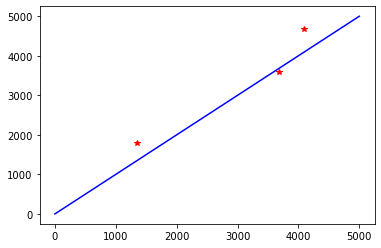

In [40]:
# comparing predicted vs actual
plt.plot(predictions, y_test, 'r*')
plt.plot([0, 5000], [0, 5000], 'b-')

# K Nearest Neighbors
This computes distances between the desired point and all other points, and takes averages of K nearest neighbors to compute predictions.

In [41]:
from sklearn.neighbors import KNeighborsRegressor

#### what does knn.fit( ) do and where are we pulling x_train and y_train from??? I'd also like to know why?

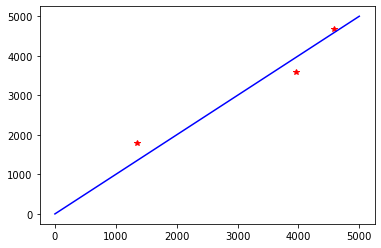

In [42]:
knn = KNeighborsRegressor(n_neighbors=2, algorithm='ball_tree')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
plt.plot(predictions, y_test, 'r*')
plt.plot([0, 5000], [0, 5000], 'b-')

Compute distances between X train and other points

In [43]:
distances, indices = knn.kneighbors(X_test)

In [44]:
print(distances)

[[0.         0.        ]
 [7.5        7.76208735]
 [0.         0.        ]]


Nearest points of each point (by indices)

In [47]:
print(indices)

[[16  6]
 [13 12]
 [ 7  4]]
